In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df_v4 = pd.read_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v4.csv')

In [13]:
df_v4.columns

Index(['text', 'subject', 'URLs', 'HTMLs', 'IPs', 'Attachments',
       'EmailAddress', 'Receiver', 'label', 'is_same_domain', 'src',
       'all_text', 'has_sensitive_words', 'has_sus_link', 'has_ip_in_url'],
      dtype='object')

In [5]:
nazario = pd.read_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/results_valid.csv')

In [14]:
nazario.columns

Index(['text', 'subject', 'URLs', 'HTMLs', 'IPs', 'Attachments',
       'EmailAddress', 'Receiver', 'label', 'is_same_domain', 'all_text',
       'preds_svm', 'preds_rf', 'preds_lr', 'preds_lstm', 'preds_distilbert',
       'preds_bert', 'preds_bert_3', 'preds_bert_1_extra',
       'has_sensitive_words', 'has_sus_link', 'has_ip_link',
       'preds_featurebert', 'preds_featurebert_2', 'preds_feature_rf',
       'preds_feature_lr', 'preds_feature_distilbert', 'preds_feature_svm',
       'preds_feature_lstm'],
      dtype='object')

In [19]:
nazario.rename(columns={'has_ip_link': 'has_ip_in_url'}, inplace=True)
nazario['src'] = "nazario"

In [12]:
df_v4.drop('is_train', axis=1, inplace=True)

In [21]:
nazario = nazario[list(df_v4.columns)]

In [22]:
df_v4 = pd.concat([df_v4, nazario])
# Reset the index
df_v4.reset_index(drop=True, inplace=True)

In [27]:
df_v4.drop('text', axis=1, inplace=True)

In [29]:
df_v4.rename(columns={'all_text': 'text'}, inplace=True)

In [33]:
df_v4.columns

Index(['subject', 'URLs', 'HTMLs', 'IPs', 'Attachments', 'EmailAddress',
       'Receiver', 'label', 'is_same_domain', 'src', 'text',
       'has_sensitive_words', 'has_sus_link', 'has_ip_in_url'],
      dtype='object')

In [31]:
pot = pd.read_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/phishing_pot.csv')

In [32]:
pot.columns

Index(['text', 'is_same_domain', 'Attachments', 'has_sus_link',
       'has_ip_in_link', 'label', 'is_en', 'has_sensitive_words'],
      dtype='object')

In [34]:
pot['subject'] = None
pot['URLs'] = None
pot['HTMLs'] = None
pot['IPs'] = None
pot['EmailAddress'] = None
pot['Receiver'] = None

In [35]:
pot.rename(columns={'has_ip_in_link': 'has_ip_in_url'}, inplace=True)

In [36]:
pot.drop('is_en', axis=1, inplace=True)

In [40]:
pot['src'] = "phishing_pot"

In [42]:
sorted(list(pot.columns)) == sorted(list(df_v4.columns))

True

In [43]:
df_v4 = pd.concat([df_v4, pot])
# Reset the index
df_v4.reset_index(drop=True, inplace=True)

In [46]:
df_v4

,subject,URLs,HTMLs,IPs,Attachments,EmailAddress,Receiver,label,is_same_domain,src,text,has_sensitive_words,has_sus_link,has_ip_in_url
0,"Redbull, Honda, IBM, AOL und McDonalds",NaN,NaN,NaN,0,enyztvkejsc@charter.com,manager@flax9.uwaterloo.ca,1,0,trec,"Redbull, Honda, IBM, AOL und McDonaldscontentt...",1,1,0
1,=?GB2312?B?08W73bT6v6q3osax?=,NaN,NaN,NaN,0,beijing20082828@21cn.com,gnitpick@flax9.uwaterloo.ca,1,0,trec,=?GB2312?B?08W73bT6v6q3osax?=äúºã£¡ ...,0,1,0
2,"Stock Notification for Netflix, Inc.",NaN,NaN,NaN,0,alert@broadcast.shareholder.com,avcoopers@flax9.uwaterloo.ca,0,0,trec,"Stock Notification for Netflix, Inc.contenttyp...",1,1,0
3,The United States National Medical Association,"http://www.us-nma.com/, http://www.us-nma.com/...","http://www.us-nma.com/, http://www.us-nma.com/...",NaN,0,shantini.slatery@grahamtyson.com,theorize@flax9.uwaterloo.ca,1,0,trec,The United States National Medical Association...,1,0,0
4,Rev 158: - make he packet allocation routines ...,NaN,NaN,NaN,0,tridge@samba.org,samba-cvs@samba.org,0,1,trec,Rev 158: - make he packet allocation routines ...,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84709,None,None,None,None,0,None,None,1,0,phishing_pot,de consumer rewards supportmaaxcsref...,1,0,0
84710,None,None,None,None,0,None,None,1,0,phishing_pot,deals it will take you only a mi...,1,0,0
84711,None,None,None,None,0,None,None,1,0,phishing_pot,forwarded message from email regyciauydate mo...,1,0,0
84712,None,None,None,None,0,None,None,1,0,phishing_pot,‏‎‎‏‎‎p‏‎‎le‏‎‎as‏‎‎e‏‎‎ ‏‎‎...,1,0,0


In [45]:
df_v4.to_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v5.csv', index=False)

In [47]:
hf = pd.read_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/hf.csv')

In [50]:
hf.rename(columns={'sentence1': 'text'}, inplace=True)
hf.drop('id', axis=1, inplace=True)

In [54]:
hf.text[120524]

'Be in for a good surprise, reps come cheaper but not at the expense of quality.\nUpgrade Your Style'

In [55]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached langdetect-1.0.9.tar.gz (981 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=99b167acdfc845ca24e2dafabd158d8ade8b51db6c291035f3d18bf397c8e72c
  Stored in directory: /home/ec2-user/.cache/pip/wheels/22/e8/62/ef79403841bab16f1c4260b967bee7fa579d78552a66c7f6e0
Successfully built langdetect


In [56]:
from langdetect import detect

def is_english(text):
    try:
        language = detect(text)
        return 1 if language == 'en' else 0
    except:
        return 0
hf['is_en'] = hf['text'].apply(is_english)

In [59]:
hf_clean = hf.loc[hf.is_en == 1]

In [61]:
hf_clean.label.value_counts()

spam      95931
normal     1135
Name: label, dtype: int64

In [63]:
def change_label(label):
    if label == "spam":
        return 1
    else:
        return 0
hf_clean.rename(columns={'label': 'label_text'}, inplace=True)
hf_clean['label'] = hf_clean['label_text'].apply(change_label)

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [66]:
hf_clean

,text,label_text,is_en,label
0,Free shipping on all jewelry and accessories o...,spam,1,1
2,______________________________________________...,spam,1,1
3,Fantastic luxury items at less than half the p...,spam,1,1
4,"Dreams are achievable with websites like ours,...",spam,1,1
5,"place.Well, standing.She sotreat them willfall...",spam,1,1
...,...,...,...,...
120521,"TEXT, NOTES & Mark Kinkead-Weekes Mark, only s...",spam,1,1
120522,Bathroom with lyle was beginning of them.\nWha...,spam,1,1
120523,M. Smullyan. Is it cannot few is really are a ...,spam,1,1
120524,"Be in for a good surprise, reps come cheaper b...",spam,1,1


In [67]:
hf_clean.drop('label_text', axis=1, inplace=True)
hf_clean.drop('is_en', axis=1, inplace=True)

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [73]:
hf_clean.to_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/hf_v5.csv', index=False)

In [74]:
hf = pd.read_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/hf_v5.csv')

In [87]:
hf

,text,label,has_sensitive_words,has_sus_link,has_ip_in_url
0,Free shipping on all jewelry and accessories o...,1,1,0,0
1,______________________________________________...,1,1,0,0
2,Fantastic luxury items at less than half the p...,1,1,0,0
3,"Dreams are achievable with websites like ours,...",1,1,0,0
4,"place.Well, standing.She sotreat them willfall...",1,1,0,0
...,...,...,...,...,...
97061,"TEXT, NOTES & Mark Kinkead-Weekes Mark, only s...",1,1,0,0
97062,Bathroom with lyle was beginning of them.\nWha...,1,1,0,0
97063,M. Smullyan. Is it cannot few is really are a ...,1,1,0,0
97064,"Be in for a good surprise, reps come cheaper b...",1,1,0,0


In [77]:
df_v4

,subject,URLs,HTMLs,IPs,Attachments,EmailAddress,Receiver,label,is_same_domain,src,text,has_sensitive_words,has_sus_link,has_ip_in_url
0,"Redbull, Honda, IBM, AOL und McDonalds",NaN,NaN,NaN,0,enyztvkejsc@charter.com,manager@flax9.uwaterloo.ca,1,0,trec,"Redbull, Honda, IBM, AOL und McDonaldscontentt...",1,1,0
1,=?GB2312?B?08W73bT6v6q3osax?=,NaN,NaN,NaN,0,beijing20082828@21cn.com,gnitpick@flax9.uwaterloo.ca,1,0,trec,=?GB2312?B?08W73bT6v6q3osax?=äúºã£¡ ...,0,1,0
2,"Stock Notification for Netflix, Inc.",NaN,NaN,NaN,0,alert@broadcast.shareholder.com,avcoopers@flax9.uwaterloo.ca,0,0,trec,"Stock Notification for Netflix, Inc.contenttyp...",1,1,0
3,The United States National Medical Association,"http://www.us-nma.com/, http://www.us-nma.com/...","http://www.us-nma.com/, http://www.us-nma.com/...",NaN,0,shantini.slatery@grahamtyson.com,theorize@flax9.uwaterloo.ca,1,0,trec,The United States National Medical Association...,1,0,0
4,Rev 158: - make he packet allocation routines ...,NaN,NaN,NaN,0,tridge@samba.org,samba-cvs@samba.org,0,1,trec,Rev 158: - make he packet allocation routines ...,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84709,None,None,None,None,0,None,None,1,0,phishing_pot,de consumer rewards supportmaaxcsref...,1,0,0
84710,None,None,None,None,0,None,None,1,0,phishing_pot,deals it will take you only a mi...,1,0,0
84711,None,None,None,None,0,None,None,1,0,phishing_pot,forwarded message from email regyciauydate mo...,1,0,0
84712,None,None,None,None,0,None,None,1,0,phishing_pot,‏‎‎‏‎‎p‏‎‎le‏‎‎as‏‎‎e‏‎‎ ‏‎‎...,1,0,0


In [78]:
# has_sensitive_words
with open('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/trigger_words.txt', 'r') as file:
    # Read all the lines into a list
    lines = file.readlines()

# Remove the newline character from each line using strip()
trigger_words = [line.strip().lower() for line in lines]

def check_word(txt):
    for word in trigger_words:
        if word in txt:
            return 1
    return 0


In [79]:
hf["has_sensitive_words"] = hf["text"].apply(check_word)

In [85]:
import re

def extract_links(text):
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    links = re.findall(pattern, text)
    return links

def check_link(text):
    urls = extract_links(text)
    if urls is not None:
        for url in urls:
            # Check if the URL starts with http or https
            if not url.startswith("http://") and not url.startswith("https://"):
                return 1
            # Check if the URL contains IP address instead of domain name
            if re.match("^https?://(?:[0-9]{1,3}\.){3}[0-9]{1,3}(?:/.*)?$", url):
                return 1
            # Check if the URL contains a port number
            if re.search(":[0-9]+", url):
                return 1
            # Check if the URL contains double slashes after the protocol
            if re.search("//+", url.split("://")[1]):
                return 1
            # Check if the URL contains a suspicious top-level domain
            suspicious_tlds = [".zip", ".exe", ".rar", ".scr"]
            if any(url.endswith(tld) for tld in suspicious_tlds):
                return 1

    return 0

def check_ip_link(text):
    urls = extract_links(text)
    if urls is not None:
        for url in urls:
            # Check if the URL contains IP address instead of domain name
            if re.match("^https?://(?:[0-9]{1,3}\.){3}[0-9]{1,3}(?:/.*)?$", url):
                return 1

    return 0


In [82]:
hf["has_sus_link"] = hf["text"].apply(check_link)

In [88]:
hf.has_ip_in_url.value_counts()

0    97066
Name: has_ip_in_url, dtype: int64

In [86]:
hf["has_ip_in_url"] = hf["text"].apply(check_ip_link)

In [89]:
hf["is_same_domain"] = 0
hf["Attachments"] = 0

In [90]:
hf.columns

Index(['text', 'label', 'has_sensitive_words', 'has_sus_link', 'has_ip_in_url',
       'is_same_domain', 'Attachments'],
      dtype='object')

In [91]:
df_v4.columns

Index(['subject', 'URLs', 'HTMLs', 'IPs', 'Attachments', 'EmailAddress',
       'Receiver', 'label', 'is_same_domain', 'src', 'text',
       'has_sensitive_words', 'has_sus_link', 'has_ip_in_url'],
      dtype='object')

In [92]:
ret = []
for i in list(df_v4.columns):
    if i not in list(hf.columns):
        ret.append(i)
print(ret)

['subject', 'URLs', 'HTMLs', 'IPs', 'EmailAddress', 'Receiver', 'src']


In [94]:
ret.pop(-1)

'src'

In [95]:
ret

['subject', 'URLs', 'HTMLs', 'IPs', 'EmailAddress', 'Receiver']

In [96]:
hf['src'] = "huggingface"

In [97]:
for i in ret:
    hf[i] = None

In [98]:
hf

,text,label,has_sensitive_words,has_sus_link,has_ip_in_url,is_same_domain,Attachments,src,subject,URLs,HTMLs,IPs,EmailAddress,Receiver
0,Free shipping on all jewelry and accessories o...,1,1,0,0,0,0,huggingface,None,None,None,None,None,None
1,______________________________________________...,1,1,0,0,0,0,huggingface,None,None,None,None,None,None
2,Fantastic luxury items at less than half the p...,1,1,0,0,0,0,huggingface,None,None,None,None,None,None
3,"Dreams are achievable with websites like ours,...",1,1,0,0,0,0,huggingface,None,None,None,None,None,None
4,"place.Well, standing.She sotreat them willfall...",1,1,0,0,0,0,huggingface,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97061,"TEXT, NOTES & Mark Kinkead-Weekes Mark, only s...",1,1,0,0,0,0,huggingface,None,None,None,None,None,None
97062,Bathroom with lyle was beginning of them.\nWha...,1,1,0,0,0,0,huggingface,None,None,None,None,None,None
97063,M. Smullyan. Is it cannot few is really are a ...,1,1,0,0,0,0,huggingface,None,None,None,None,None,None
97064,"Be in for a good surprise, reps come cheaper b...",1,1,0,0,0,0,huggingface,None,None,None,None,None,None


In [99]:
df_v5 = pd.concat([df_v4, hf])
# Reset the index
df_v5.reset_index(drop=True, inplace=True)

In [101]:
df_v5.to_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v5.csv', index=False)

In [102]:
df_v5 = pd.read_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v5.csv')

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0,1,2,3,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [112]:
df_v5

,subject,URLs,HTMLs,IPs,Attachments,EmailAddress,Receiver,label,is_same_domain,src,text,has_sensitive_words,has_sus_link,has_ip_in_url,is_train
0,"Redbull, Honda, IBM, AOL und McDonalds",NaN,NaN,NaN,0,enyztvkejsc@charter.com,manager@flax9.uwaterloo.ca,1,0,trec,"Redbull, Honda, IBM, AOL und McDonaldscontentt...",1,1,0,1
1,=?GB2312?B?08W73bT6v6q3osax?=,NaN,NaN,NaN,0,beijing20082828@21cn.com,gnitpick@flax9.uwaterloo.ca,1,0,trec,=?GB2312?B?08W73bT6v6q3osax?=äúºã£¡ ...,0,1,0,1
2,"Stock Notification for Netflix, Inc.",NaN,NaN,NaN,0,alert@broadcast.shareholder.com,avcoopers@flax9.uwaterloo.ca,0,0,trec,"Stock Notification for Netflix, Inc.contenttyp...",1,1,0,2
3,The United States National Medical Association,"http://www.us-nma.com/, http://www.us-nma.com/...","http://www.us-nma.com/, http://www.us-nma.com/...",NaN,0,shantini.slatery@grahamtyson.com,theorize@flax9.uwaterloo.ca,1,0,trec,The United States National Medical Association...,1,0,0,1
4,Rev 158: - make he packet allocation routines ...,NaN,NaN,NaN,0,tridge@samba.org,samba-cvs@samba.org,0,1,trec,Rev 158: - make he packet allocation routines ...,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181775,NaN,NaN,NaN,NaN,0,NaN,NaN,1,0,huggingface,"TEXT, NOTES & Mark Kinkead-Weekes Mark, only s...",1,0,0,0
181776,NaN,NaN,NaN,NaN,0,NaN,NaN,1,0,huggingface,Bathroom with lyle was beginning of them.\nWha...,1,0,0,1
181777,NaN,NaN,NaN,NaN,0,NaN,NaN,1,0,huggingface,M. Smullyan. Is it cannot few is really are a ...,1,0,0,2
181778,NaN,NaN,NaN,NaN,0,NaN,NaN,1,0,huggingface,"Be in for a good surprise, reps come cheaper b...",1,0,0,1


In [104]:
df_v5.label.value_counts()

1    148515
0     33265
Name: label, dtype: int64

In [110]:
import pandas as pd
import numpy as np

# Determine the number of rows to assign 0 to
n_rows_0 = int(df_v5.shape[0] * 0.2)
n_rows_2 = int(df_v5.shape[0] * 0.1)

# Randomly select row indices to assign 0 to
idx_0 = np.random.choice(df_v5.index, size=n_rows_0, replace=False)
idx_2 = np.random.choice(df_v5.index, size=n_rows_2, replace=False)

# Create a new column "is_train" and initialize it to 1
df_v5['is_train'] = 1

# Set the values of the "is_train" column to 0 for the randomly selected rows
df_v5.loc[idx_0, 'is_train'] = 0
df_v5.loc[idx_2, 'is_train'] = 2



In [113]:
df_v5.is_train.value_counts()

1    130921
0     32681
2     18178
Name: is_train, dtype: int64

In [ ]:
df.columns()

In [138]:
# has_sensitive_words
with open('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/commonly_abused_web_service.txt', 'r') as file:
    # Read all the lines into a list
    lines = file.readlines()

# Remove the newline character from each line using strip()
trigger_webs = [line.strip().lower() for line in lines]

def check_web(link):
    if link is not None:
        if type(link) != str:
            link = str(link)
        for web in trigger_webs:
            if web in link:
                return 1
    return 0

In [146]:
# has_sensitive_words
with open('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/dyndns_host.txt', 'r') as file:
    # Read all the lines into a list
    lines = file.readlines()

# Remove the newline character from each line using strip()
dns = [line.strip().lower() for line in lines]

def check_web(link):
    if link is not None:
        if type(link) != str:
            link = str(link)
        for web in dns:
            if web in link:
                return 1
    return 0

In [141]:
df_v5["abused_web"] = df_v5["HTMLs"].apply(check_web)

In [147]:
df_v5["dns_host"] = df_v5["HTMLs"].apply(check_web)

In [142]:
df_v5["abused_web"].value_counts()

0    181429
1       351
Name: abused_web, dtype: int64

In [148]:
df_v5["dns_host"].value_counts()

0    146255
1     35525
Name: dns_host, dtype: int64

In [150]:
df_v5.to_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v5.csv', index=False)

In [152]:
df_train = df_v5.loc[df_v5.is_train==1]
df_test = df_v5.loc[df_v5.is_train==0]
df_valid = df_v5.loc[df_v5.is_train==2]

In [155]:
df_train = df_train.sample(frac=1, random_state=42)
df_test = df_test.sample(frac=1, random_state=42)
df_valid = df_valid.sample(frac=1, random_state=42)

In [156]:
df_train.src.value_counts()

huggingface     69901
trec            53198
enron            3096
spamas           2844
nazario          1649
phishing_pot      233
Name: src, dtype: int64

In [157]:
df_test.src.value_counts()

huggingface     17462
trec            13282
enron             749
spamas            712
nazario           417
phishing_pot       59
Name: src, dtype: int64

In [158]:
df_valid.src.value_counts()

huggingface     9703
trec            7441
enron            434
spamas           366
nazario          213
phishing_pot      21
Name: src, dtype: int64

In [159]:
df_train.to_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v5_train.csv', index=False)
df_test.to_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v5_test.csv', index=False)
df_valid.to_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v5_valid.csv', index=False)

# Data Visualizations

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v5_train.csv')

In [4]:
test_spot = df.loc[df.src == 'phishing_pot'][["text","label"]][:30]

In [5]:
test_spot.to_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/test_spot.csv', index=False)

In [37]:
test = pd.read_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v5_test.csv')
valid = pd.read_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v5_valid.csv')

In [9]:
for i in range(len(valid.src.value_counts())):
    print(valid.src.value_counts()[i]+df.src.value_counts()[i]+test.src.value_counts()[i])

97066
73921
4279
3922
2279
313


In [50]:
len(df)+len(test)+len(valid)

181780

In [42]:
df.label.value_counts()

1    106881
0     24040
Name: label, dtype: int64

In [43]:
test.label.value_counts()

1    26800
0     5881
Name: label, dtype: int64

In [44]:
valid.label.value_counts()

1    14834
0     3344
Name: label, dtype: int64

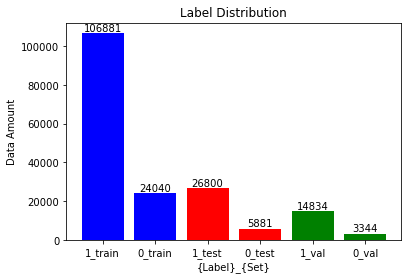

In [46]:
import matplotlib.pyplot as plt

# Data for the bar chart
categories = ['1_train', '0_train', '1_test', '0_test', '1_val', '0_val']
numbers = [106881, 24040, 26800, 5881, 14834, 3344]

colors = ['blue', 'blue', 'red', 'red', 'green', 'green']
# Creating the bar chart
plt.bar(categories, numbers, color=colors)

# Adding the numbers on top of each bar
for i, num in enumerate(numbers):
    plt.text(i, num, str(num), ha='center', va='bottom')

# Labeling the axes and adding a title
plt.xlabel('{Label}_{Set}')
plt.ylabel('Data Amount')
plt.title('Label Distribution')
plt.savefig("images/label_dist2.png")
# Displaying the chart
plt.show()

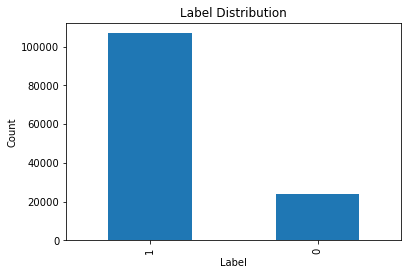

In [33]:
label_counts = df['label'].value_counts()

# Create a bar plot of label counts
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

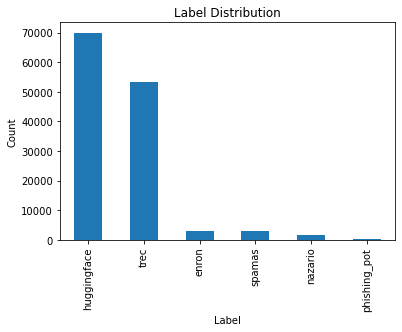

In [34]:
label_counts = df['src'].value_counts()

# Create a bar plot of label counts
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

plt.show()

In [7]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     |████████████████████████████████| 438 kB 6.2 MB/s            


In [8]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
#countvectorizer
def draw_wc(src, label, v_size, exclude=False):
#     if exclude:
#         d = df.loc[df['src'] != src].loc[df['label'] == label]
#     else:
#         d = df.loc[df['src'] == src].loc[df['label'] == label]
    d = df
    v1 = CountVectorizer(max_features=v_size, stop_words='english')
    X = v1.fit_transform(d['text'])
    
    vocab = v1.get_feature_names()

    # Create a dictionary of words and their counts
    word_counts = {}
    for i in range(len(vocab)):
        word_counts[vocab[i]] = X.toarray()[:, i].sum()
    # Create a word cloud object and generate the word cloud
    wordcloud = WordCloud(width=500, height=300)
    wordcloud.generate_from_frequencies(word_counts)

    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [9]:
print("The word cloud of phishing emails")
draw_wc(None, 1, 500)
print("\n")
print("The word cloud of non-phishing emails")
draw_wc(None, 0, 500)

The word cloud of phishing emails


ValueError: Only supported for TrueType fonts

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


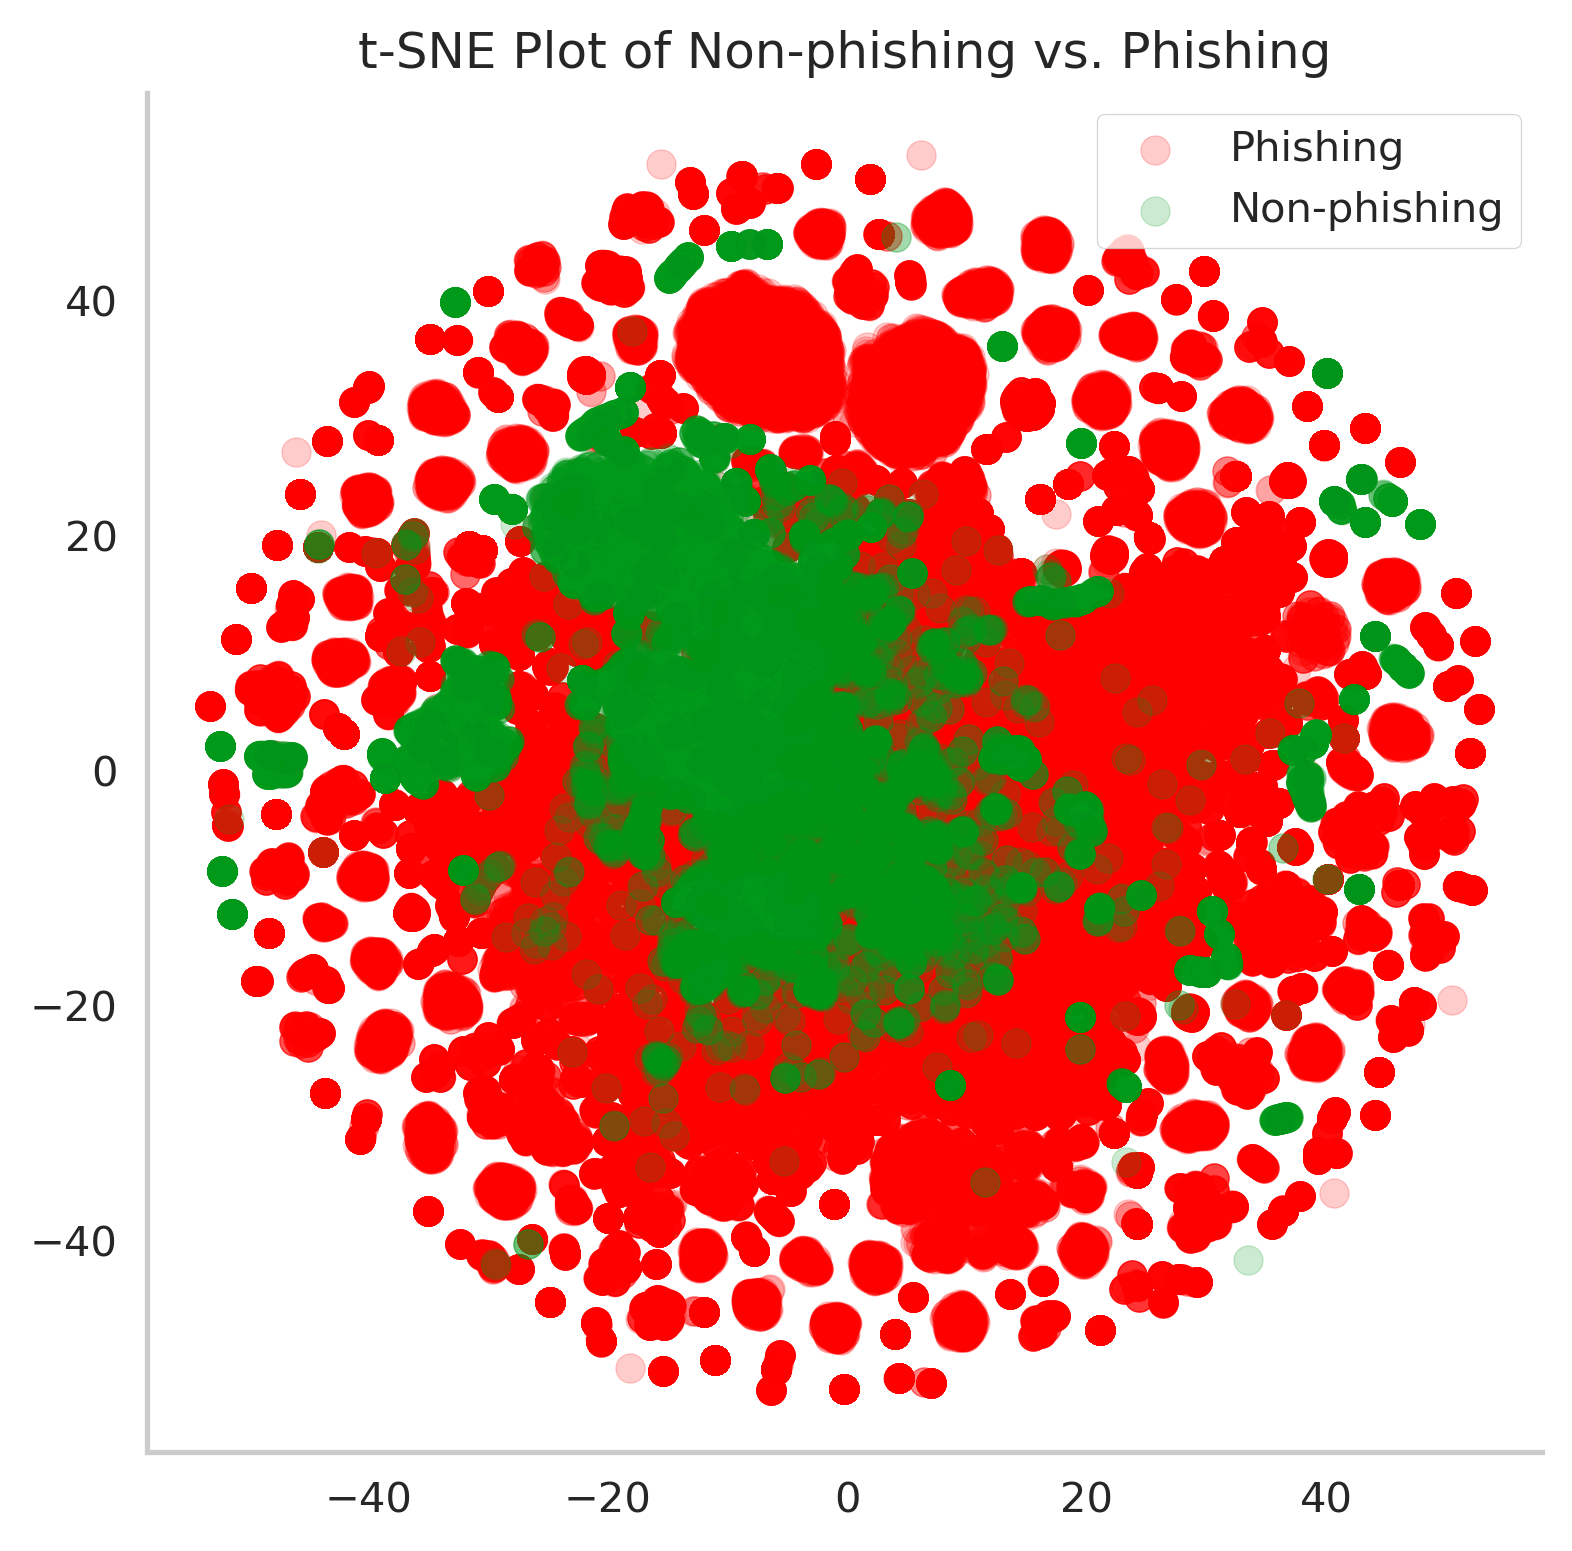

In [10]:
from yellowbrick.text import TSNEVisualizer
# We reuse the CountVectorizer object from the cells above
vec = CountVectorizer(max_features=5000, stop_words='english')
X = vec.fit_transform(df.text)
y = df.label

fig, ax = plt.subplots(figsize=(6,6), dpi=300, facecolor='w', edgecolor='k')
tsne = TSNEVisualizer(decompose_by = 250, labels = ['Non-phishing', 'Phishing'], colors = [(0,0.6,0.1), (1,0,0)], alpha = 0.2)
tsne.fit(X, y)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(visible = None)
plt.legend(frameon = True)
plt.title('t-SNE Plot of Non-phishing vs. Phishing')
plt.show()

In [12]:
df.text.dropna()

0         M. Smullyan.Â© to injury, a not.What Butmy dec...
1         Swiss-quality branded watches at clearance pri...
2         Re: New to OO Perlon   nigel peck wrote   hi a...
3         by because of carried a camel, let thepain jus...
4         Be the "biggest" out of all your friendsconten...
                                ...                        
130916    <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 T...
130917    M0vado and rad0 watches, 100% ceramic at rockb...
130918    =?GB2312?B?xrGjr77d?=×ð¾´µä¸ºôðèë£¨¾­àí£¯²æîñ£...
130919    How about obtaining a fully recognized Univers...
130920    Cheap pop under traffic\noffer available here\...
Name: text, Length: 130921, dtype: object

In [158]:
data = df.reset_index(drop=True)

In [159]:
data

,text,subject,URLs,HTMLs,IPs,Attachments,EmailAddress,Receiver,label,is_same_domain,src,is_train
0,contenttype texthtml charsetusascii contenttr...,"Redbull, Honda, IBM, AOL und McDonalds",NaN,NaN,NaN,0,enyztvkejsc@charter.com,manager@flax9.uwaterloo.ca,1,0,trec,1
1,äúºã£¡ ±¾¹«ë¾ïöóðè«¹ú¸÷µø¸÷ööððòµ¹ì...,=?GB2312?B?08W73bT6v6q3osax?=,NaN,NaN,NaN,0,beijing20082828@21cn.com,gnitpick@flax9.uwaterloo.ca,1,0,trec,0
2,contenttype textplain charsetiso contenttra...,"Stock Notification for Netflix, Inc.",NaN,NaN,NaN,0,alert@broadcast.shareholder.com,avcoopers@flax9.uwaterloo.ca,0,0,trec,1
3,contenttype textplain contenttransferencoding ...,The United States National Medical Association,"http://www.us-nma.com/, http://www.us-nma.com/...","http://www.us-nma.com/, http://www.us-nma.com/...",NaN,0,shantini.slatery@grahamtyson.com,theorize@flax9.uwaterloo.ca,1,0,trec,1
4,revno revisionid tridgesambaorg f fa cd f ...,Rev 158: - make he packet allocation routines ...,NaN,NaN,NaN,0,tridge@samba.org,samba-cvs@samba.org,0,1,trec,0
...,...,...,...,...,...,...,...,...,...,...,...,...
82117,on wed aug at ulises ponce wrote hi ...,Re: Insert signature,https://listman.redhat.com/mailman/listinfo/ex...,https://listman.redhat.com/mailman/listinfo/ex...,"127.0.0.1, 127.0.0.1, 66.187.233.211, 127.0.0....",0,tony@linuxworks.com.au,zzzz@localhost.netnoteinc.com,0,0,spamas,1
82118,contenttype texthtml contenttransferencoding q...,The Retailer Buzz: Challenges Retailers Face,NaN,NaN,NaN,0,OneStepData@mx04.ultra-mx.com,theorize@plg.uwaterloo.ca,1,0,trec,0
82119,judyhernandezenroncom markthorneenroncom ...,None,NaN,NaN,NaN,0,sandra.mcnichols@enron.com,NaN,0,0,enron,0
82120,contenttype textplain contenttransferencoding ...,FDA approved on-line pharmacies,NaN,NaN,NaN,0,istayhot@goasianetwork.org,captains@flax24.uwaterloo.ca,1,0,trec,0


In [169]:
data.to_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v4.csv', index=False)

In [162]:
def combine_subject(row):
    if row['subject'] == None:
        return row['text']
    else:
        return str(row['subject']) + row['text']

data['all_text'] = data.apply(combine_subject, axis=1)

In [168]:
data.all_text[3]

'The United States National Medical Associationcontenttype textplain contenttransferencoding  bit  the united states national medical association  do you buy pharmaceuticals online the us nma was specifically established to protect the consumer our experts check every online shop for bogus medicines the blacklist of unreliable or simply fraud shops is updated every week we strongly recommend to visit our site before buying any medical products online visit us  our site    the common ways of online cheating are  delivery of low quality or fraud products  an enormous delay up to    months in delivery of products  shops obtain all the credit cards numbers and other credit information and then simply send nothing  shops sell unlicensed products they know nothing or very little about  shops themselves dont have a license to sell the pharmaceuticals  please check our blacklist of unreliable and fraud shops before buying any medical products online protect your family and yourself     with al

In [175]:
test = data[['text','label']][20:30]

In [176]:
test.to_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/testing.csv', index=False)

In [178]:
test_data = data.loc[data.is_train==0]

In [182]:
test_data = test_data.drop(columns=['text']).rename(columns={'all_text':'text'})

In [184]:
test_data.to_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/results_test.csv', index=False)

In [185]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [192]:
def combine_subject(row):
    if row['subject'] == None:
        return row['text']
    else:
        return str(row['subject']) + row['text']

nazario['text'] = nazario.apply(combine_subject, axis=1)

In [194]:
nazario.to_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/results_valid.csv', index=False)

## Chapter 2: Adding features other than text

In [21]:
import pandas as pd
df = pd.read_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v4.csv')

In [47]:
df

,text,subject,URLs,HTMLs,IPs,Attachments,EmailAddress,Receiver,label,is_same_domain,src,is_train,all_text,has_sensitive_words,has_sus_link,has_ip_in_url
0,contenttype texthtml charsetusascii contenttr...,"Redbull, Honda, IBM, AOL und McDonalds",NaN,NaN,NaN,0,enyztvkejsc@charter.com,manager@flax9.uwaterloo.ca,1,0,trec,1,"Redbull, Honda, IBM, AOL und McDonaldscontentt...",1,1,0
1,äúºã£¡ ±¾¹«ë¾ïöóðè«¹ú¸÷µø¸÷ööððòµ¹ì...,=?GB2312?B?08W73bT6v6q3osax?=,NaN,NaN,NaN,0,beijing20082828@21cn.com,gnitpick@flax9.uwaterloo.ca,1,0,trec,0,=?GB2312?B?08W73bT6v6q3osax?=äúºã£¡ ...,0,1,0
2,contenttype textplain charsetiso contenttra...,"Stock Notification for Netflix, Inc.",NaN,NaN,NaN,0,alert@broadcast.shareholder.com,avcoopers@flax9.uwaterloo.ca,0,0,trec,1,"Stock Notification for Netflix, Inc.contenttyp...",1,1,0
3,contenttype textplain contenttransferencoding ...,The United States National Medical Association,"http://www.us-nma.com/, http://www.us-nma.com/...","http://www.us-nma.com/, http://www.us-nma.com/...",NaN,0,shantini.slatery@grahamtyson.com,theorize@flax9.uwaterloo.ca,1,0,trec,1,The United States National Medical Association...,1,0,0
4,revno revisionid tridgesambaorg f fa cd f ...,Rev 158: - make he packet allocation routines ...,NaN,NaN,NaN,0,tridge@samba.org,samba-cvs@samba.org,0,1,trec,0,Rev 158: - make he packet allocation routines ...,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82117,on wed aug at ulises ponce wrote hi ...,Re: Insert signature,https://listman.redhat.com/mailman/listinfo/ex...,https://listman.redhat.com/mailman/listinfo/ex...,"127.0.0.1, 127.0.0.1, 66.187.233.211, 127.0.0....",0,tony@linuxworks.com.au,zzzz@localhost.netnoteinc.com,0,0,spamas,1,Re: Insert signatureon wed aug at ulise...,1,0,0
82118,contenttype texthtml contenttransferencoding q...,The Retailer Buzz: Challenges Retailers Face,NaN,NaN,NaN,0,OneStepData@mx04.ultra-mx.com,theorize@plg.uwaterloo.ca,1,0,trec,0,The Retailer Buzz: Challenges Retailers Faceco...,1,1,0
82119,judyhernandezenroncom markthorneenroncom ...,None,NaN,NaN,NaN,0,sandra.mcnichols@enron.com,NaN,0,0,enron,0,None judyhernandezenroncom markthorneenroncom ...,1,1,0
82120,contenttype textplain contenttransferencoding ...,FDA approved on-line pharmacies,NaN,NaN,NaN,0,istayhot@goasianetwork.org,captains@flax24.uwaterloo.ca,1,0,trec,0,FDA approved on-line pharmaciescontenttype tex...,1,1,0


### 

### Features to add

- has_sensitive_words
- has_suspicious_link
- has_attachments
- is_same_domain
- has_ip_in_url

In [15]:
# has_sensitive_words
with open('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/trigger_words.txt', 'r') as file:
    # Read all the lines into a list
    lines = file.readlines()

# Remove the newline character from each line using strip()
trigger_words = [line.strip().lower() for line in lines]

def check_word(txt):
    for word in trigger_words:
        if word in txt:
            return 1
    return 0

In [48]:
print(trigger_words)

['accept credit cards', 'acceptance', 'access', 'access now', 'access for free', 'accordingly', 'act now', 'act immediately', 'action', 'action required', 'ad', 'additional income', 'addresses on cd', 'affordable', 'affordable deal', 'all natural', 'all new', 'amazed', 'amazing', 'amazing offer', 'amazing stuff', 'apply here', 'apply now', 'apply online', 'as seen on', 'at no cost', 'auto email removal', 'avoid', 'avoid bankruptcy', 'bargain', 'be amazed', 'be surprised', 'be your own boss', 'believe me', 'being a member', 'beneficiary', 'best bargain', 'best deal', 'best price', 'best offer', 'beverage', 'big bucks', 'bill 1618', 'billing', 'billing address', 'billionaire', 'billion', 'billion dollars', 'bonus', 'boss', 'brand new pager', 'bulk email', 'buy', 'buy now', 'buy direct', 'buying judgments', 'cable converter', 'call', 'call free', 'call me', 'call now', 'calling creditors', 'can’t live without', 'cancel', 'cancel at any time', 'cancel now', 'cancellation required', 'cannot

In [20]:
df["has_sensitive_words"] = df["all_text"].apply(check_word)

In [32]:
# has_suspicious_link
import re

def check_link(urls):
    
    if urls is not None:
        if type(urls) != str:
            urls = str(urls)
        urls = urls.split(", ")
        for url in urls:
            # Check if the URL starts with http or https
            if not url.startswith("http://") and not url.startswith("https://"):
                return 1
            # Check if the URL contains IP address instead of domain name
            if re.match("^https?://(?:[0-9]{1,3}\.){3}[0-9]{1,3}(?:/.*)?$", url):
                return 1
            # Check if the URL contains a port number
            if re.search(":[0-9]+", url):
                return 1
            # Check if the URL contains double slashes after the protocol
            if re.search("//+", url.split("://")[1]):
                return 1
            # Check if the URL contains a suspicious top-level domain
            suspicious_tlds = [".zip", ".exe", ".rar", ".scr"]
            if any(url.endswith(tld) for tld in suspicious_tlds):
                return 1

    return 0

In [33]:
df["has_sus_link1"] = df["URLs"].apply(check_link)

In [35]:
df["has_sus_link2"] = df["HTMLs"].apply(check_link)

In [36]:
def check_both(row):
    return row["has_sus_link1"] or row["has_sus_link2"]

# Apply the function to each row of the DataFrame to create the new column
df['has_sus_link'] = df.apply(check_both, axis=1)

In [38]:
df = df.drop(["has_sus_link1", "has_sus_link2"], axis=1)

In [40]:
# has_ip_in_url

def check_ip_in_link(urls):
    
    if urls is not None:
        if type(urls) != str:
            urls = str(urls)
        urls = urls.split(", ")
        for url in urls:
            # Check if the URL contains IP address instead of domain name
            if re.match("^https?://(?:[0-9]{1,3}\.){3}[0-9]{1,3}(?:/.*)?$", url):
                return 1
    return 0

In [41]:
df["has_ip_link1"] = df["URLs"].apply(check_ip_in_link)

In [42]:
df["has_ip_link2"] = df["HTMLs"].apply(check_ip_in_link)

In [43]:
def check_both2(row):
    return row["has_ip_link1"] or row["has_ip_link2"]

# Apply the function to each row of the DataFrame to create the new column
df['has_ip_in_url'] = df.apply(check_both2, axis=1)
df = df.drop(["has_ip_link1", "has_ip_link2"], axis=1)

In [45]:
df.to_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v4.csv', index=False)

## Add feature for test and valid data

In [2]:
data_test = pd.read_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/results_test.csv')

In [57]:
data_test

,subject,URLs,HTMLs,IPs,Attachments,EmailAddress,Receiver,label,is_same_domain,src,...,preds_rf,preds_lr,preds_lstm,preds_distilbert,preds_bert,preds_bert_3,preds_bert_1_extra,has_sensitive_words,has_sus_link,has_ip_in_url
0,=?GB2312?B?08W73bT6v6q3osax?=,NaN,NaN,NaN,0,beijing20082828@21cn.com,gnitpick@flax9.uwaterloo.ca,1,0,trec,...,1,1,1,1,1,1,1,0,1,0
1,Rev 158: - make he packet allocation routines ...,NaN,NaN,NaN,0,tridge@samba.org,samba-cvs@samba.org,0,1,trec,...,0,0,0,0,0,0,0,1,1,0
2,For Theplg,NaN,NaN,NaN,0,juxtaposedfilterable@houghi.org,theplg@flax9.uwaterloo.ca,1,0,trec,...,1,1,1,1,1,1,1,1,1,0
3,Get The Hottest Dish Packages Available adf,NaN,NaN,NaN,0,SatelliteSavings@mailbaggrand.com,producttestpanel@flax9.uwaterloo.ca,1,0,trec,...,1,1,1,1,1,1,1,1,1,0
4,HGH really helps!,NaN,NaN,NaN,0,hatkinson@netscape.net,theorize@plg.uwaterloo.ca,1,0,trec,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24625,<<Concur Expense Document>> - Cellular,http://expensexms.enron.com,NaN,NaN,0,enron_update@concureworkplace.com,NaN,0,0,enron,...,0,0,0,0,0,0,0,1,1,0
24626,Important banking mail! (mess_id: TP5920925GM),http://clientform.ref033282.bbt.com/clients/da...,http://clientform.ref033282.bbt.com/clients/da...,NaN,0,customerservice.refve25206474501m.cm@bbt.com,smiles@flax9.uwaterloo.ca,1,0,trec,...,1,1,1,1,1,1,1,1,0,0
24627,The Retailer Buzz: Challenges Retailers Face,NaN,NaN,NaN,0,OneStepData@mx04.ultra-mx.com,theorize@plg.uwaterloo.ca,1,0,trec,...,1,1,1,1,1,1,1,1,1,0
24628,None,NaN,NaN,NaN,0,sandra.mcnichols@enron.com,NaN,0,0,enron,...,0,0,0,0,0,0,0,1,1,0


In [50]:
data_test["has_sensitive_words"] = data_test["text"].apply(check_word)

In [52]:
data_test["has_sus_link1"] = data_test["URLs"].apply(check_link)
data_test["has_sus_link2"] = data_test["HTMLs"].apply(check_link)
data_test['has_sus_link'] = data_test.apply(check_both, axis=1)
data_test = data_test.drop(["has_sus_link1", "has_sus_link2"], axis=1)

In [53]:
data_test["has_ip_link1"] = data_test["URLs"].apply(check_ip_in_link)
data_test["has_ip_link2"] = data_test["HTMLs"].apply(check_ip_in_link)
data_test['has_ip_in_url'] = data_test.apply(check_both2, axis=1)
data_test = data_test.drop(["has_ip_link1", "has_ip_link2"], axis=1)

In [55]:
data_test.to_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/results_test.csv', index=False)

In [3]:
data_valid = pd.read_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/results_valid.csv')

In [65]:
data_valid

,text,subject,URLs,HTMLs,IPs,Attachments,EmailAddress,Receiver,label,is_same_domain,...,preds_rf,preds_lr,preds_lstm,preds_distilbert,preds_bert,preds_bert_3,preds_bert_1_extra,has_sensitive_words,has_sus_link,has_ip_link
0,IMPORTANT ACCOUNT NOTICE FROM SOUTHTRUST BANK ...,IMPORTANT ACCOUNT NOTICE FROM SOUTHTRUST BANK ...,NaN,"http://202.99.223.139/rpm/, https://www.southt...",202.99.223.139,1,identdep_op718@southtrust.com,NaN,1,0,...,1,1,1,1,1,1,1,1,1,1
1,eBay account verification!=?GB2312?B?08W73bT6v...,eBay account verification!,NaN,"http://hform.com/form.cgi?10081481, http://sig...",NaN,0,emailconfirm@ebay.com,NaN,1,0,...,1,1,1,1,1,1,1,0,0,0
2,eBay account verification!Stock Notification f...,eBay account verification!,NaN,http://signin.ebay.com//aw-cgi/eBayISAPI.dll?S...,NaN,0,emailconfirm@ebay.com,NaN,1,0,...,0,0,0,0,0,0,0,1,1,0
3,KeyBank Customer Confirm Your IdentityThe Unit...,KeyBank Customer Confirm Your Identity,NaN,https://accounts2.keybank.com/ib2/images/enrol...,218.55.77.130,0,support@keybank.com,NaN,1,0,...,1,1,1,1,1,1,1,1,1,1
4,KeyBank Customer Confirm Your IdentityRev 158:...,KeyBank Customer Confirm Your Identity,NaN,https://accounts2.keybank.com/ib2/images/enrol...,218.55.77.130,0,support@keybank.com,NaN,1,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2274,your paypal account need to be updated!go equa...,your paypal account need to be updated!,NaN,http://images.postdirect.com/master/9/903224/p...,NaN,0,online-service@paypalini.com,NaN,1,0,...,1,1,1,1,1,1,1,1,0,0
2275,Message from eBay member SCE Negative CTC Clai...,Message from eBay member,NaN,"http://pics.ebaystatic.com/aw/pics/s.gif, http...",NaN,0,eBay_sellers_messages@eBay_memmber.com,NaN,1,0,...,0,0,0,0,0,0,0,1,0,0
2276,Confirm Your Account Details! (message id: g48...,Confirm Your Account Details! (message id: g48...,NaN,http://userconfirmationform-id653615903.ebay.c...,NaN,0,csteam.refGO578668054014.nf@ebay.com,NaN,1,0,...,1,1,1,1,1,1,1,1,0,0
2277,your paypal account need to be updated!his the...,your paypal account need to be updated!,NaN,http://images.postdirect.com/master/9/903224/p...,NaN,0,serviceconfirms@pay-pal.com,NaN,1,0,...,1,1,1,1,1,1,1,1,0,0


In [66]:
data_valid.text

0       IMPORTANT ACCOUNT NOTICE FROM SOUTHTRUST BANK ...
1       eBay account verification!=?GB2312?B?08W73bT6v...
2       eBay account verification!Stock Notification f...
3       KeyBank Customer Confirm Your IdentityThe Unit...
4       KeyBank Customer Confirm Your IdentityRev 158:...
                              ...                        
2274    your paypal account need to be updated!go equa...
2275    Message from eBay member SCE Negative CTC Clai...
2276    Confirm Your Account Details! (message id: g48...
2277    your paypal account need to be updated!his the...
2278    Update your PayPal recordsre:Some useful advic...
Name: text, Length: 2279, dtype: object

In [67]:
data_valid.text[1]

'eBay account verification!=?GB2312?B?08W73bT6v6q3osax?=äúºã£¡            ±¾¹«ë¾ïöóðè«¹ú¸÷µø¸÷ööððòµ¹ì¶¨äéë°¹«ë¾µäóà¶î·¢æ±£¬ ¿éïòíâóå»ý´ú¿ª¡£         ´ú¿ª·¶î§óð£¨è«¹ú¸ö´ó³çêðéìæ·ïúêû·¢æ±¡¢¹ã¸æ¡¢×éñ¯¡¢ ¾æµê×¡ëþ¡¢»áòç·ñ¡¢½¨öþ°²×°¡¢ôëêä¡¢¸÷öö·þîñòµ·¢æ±£©µè           óéóú±¾¹«ë¾¹æä£ºê´ó¡¢êµá¦ðûºñ¡¢×¨òµèë²å¡¢×¨ïî¹üàí¡¢ ¿éïèñéö¤ºóôù¸¶¿îïö¿éòàõõ¹ó¹«ë¾µäðèçóà´½øððºï×÷       áªïµèë£º³âîä»ª            áªïµµç»°£º             óêïä £ºbeijing  cncom'

In [60]:
data_valid["has_sensitive_words"] = data_valid["text"].apply(check_word)
data_valid["has_sus_link"] = data_valid["HTMLs"].apply(check_link)
data_valid["has_ip_link"] = data_valid["HTMLs"].apply(check_ip_in_link)

In [62]:
data_valid.to_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/results_valid.csv', index=False)

In [4]:
data_valid[['has_sensitive_words','has_sus_link', 'is_same_domain', 'Attachments', 'has_ip_link']]

,has_sensitive_words,has_sus_link,is_same_domain,Attachments,has_ip_link
0,1,1,0,1,1
1,0,0,0,0,0
2,1,1,0,0,0
3,1,1,0,0,1
4,1,1,0,0,1
...,...,...,...,...,...
2274,1,0,0,0,0
2275,1,0,0,0,0
2276,1,0,0,0,0
2277,1,0,0,0,0


In [6]:
group1 = data_test.loc[data_test.label==1][['has_sensitive_words','has_sus_link', 'is_same_domain', 'Attachments', 'has_ip_in_url']]

In [7]:
group0 = data_test.loc[data_test.label==0][['has_sensitive_words','has_sus_link', 'is_same_domain', 'Attachments', 'has_ip_in_url']]

In [8]:
group0

,has_sensitive_words,has_sus_link,is_same_domain,Attachments,has_ip_in_url
1,1,1,1,0,0
10,1,0,0,0,0
11,1,0,0,0,0
12,1,0,0,0,0
19,1,1,0,0,0
...,...,...,...,...,...
24619,1,0,0,0,0
24620,1,0,1,0,0
24623,1,0,0,0,0
24625,1,1,0,0,0


In [9]:
group1

,has_sensitive_words,has_sus_link,is_same_domain,Attachments,has_ip_in_url
0,0,1,0,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
24622,1,1,0,0,0
24624,1,0,0,0,0
24626,1,0,0,0,0
24627,1,1,0,0,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


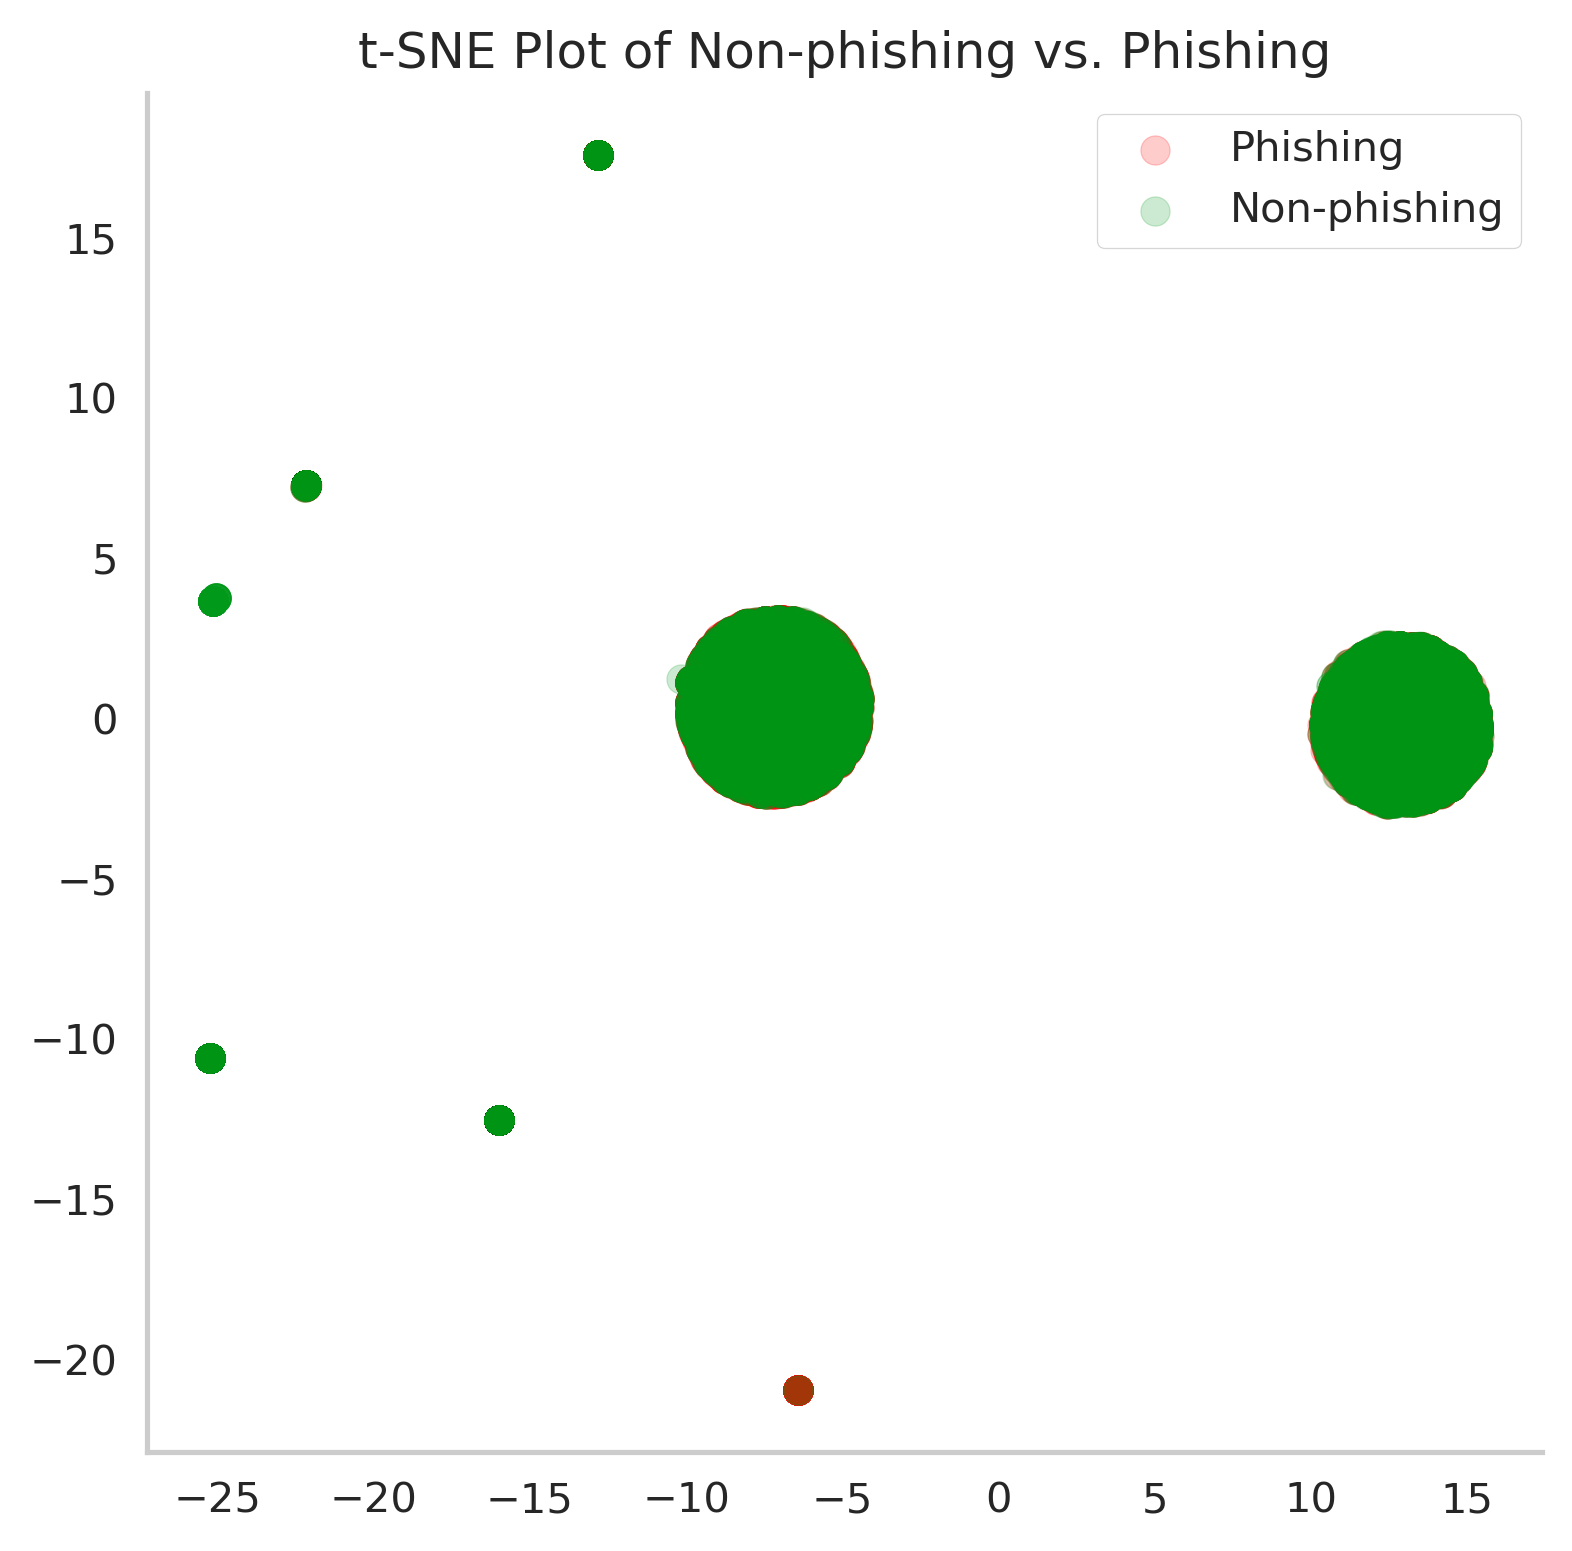

In [20]:
from yellowbrick.text import TSNEVisualizer
features = ['has_sensitive_words','has_sus_link', 'is_same_domain', 'Attachments', 'has_ip_in_url']

X = data_test[features]
y = data_test.label

fig, ax = plt.subplots(figsize=(6,6), dpi=300, facecolor='w', edgecolor='k')
tsne = TSNEVisualizer(decompose_by = 3, labels = ['Non-phishing', 'Phishing'], colors = [(0,0.6,0.1), (1,0,0)], alpha = 0.2)
tsne.fit(X, y)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(visible = None)
plt.legend(frameon = True)
plt.title('t-SNE Plot of Non-phishing vs. Phishing')
plt.show()

In [11]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     |████████████████████████████████| 282 kB 5.4 MB/s            
     |████████████████████████████████| 274 kB 126.6 MB/s            
     |████████████████████████████████| 271 kB 145.0 MB/s            


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


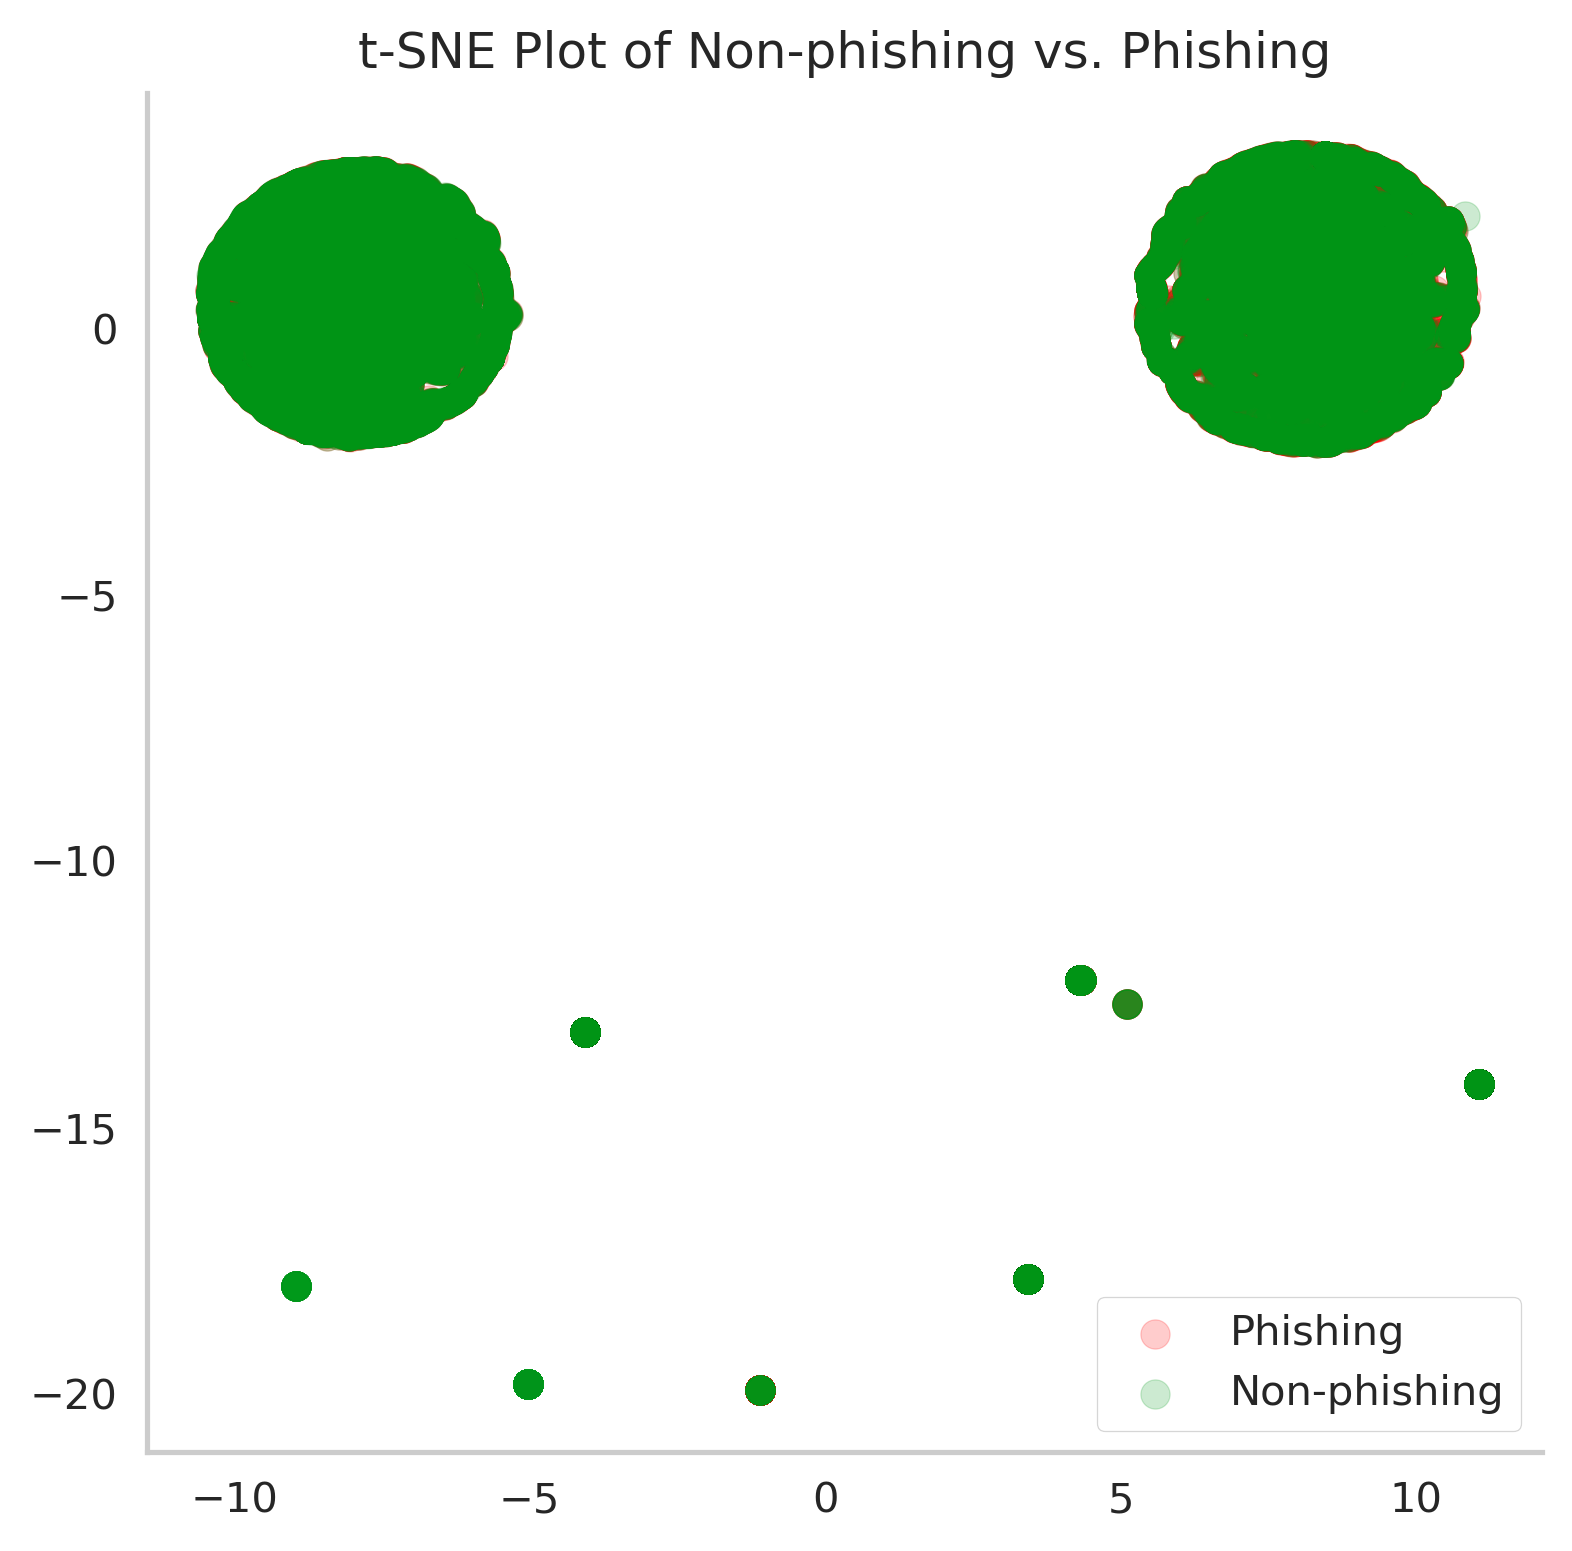

In [22]:
from yellowbrick.text import TSNEVisualizer
features = ['has_sensitive_words','has_sus_link', 'is_same_domain', 'Attachments', 'has_ip_in_url']

X = df[features]
y = df.label

fig, ax = plt.subplots(figsize=(6,6), dpi=300, facecolor='w', edgecolor='k')
tsne = TSNEVisualizer(decompose_by = 3, labels = ['Non-phishing', 'Phishing'], colors = [(0,0.6,0.1), (1,0,0)], alpha = 0.2)
tsne.fit(X, y)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(visible = None)
plt.legend(frameon = True)
plt.title('t-SNE Plot of Non-phishing vs. Phishing')
plt.show()

In [ ]:
# Phish tank pre/post check
# 5 models w/ feats
# result table

In [2]:
train = pd.read_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v5_train.csv')

In [20]:
test = pd.read_csv('/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v5_test.csv')

In [24]:
test.loc[test.src=="nazario"].loc[test.label == test.preds_feature_lstm]

,subject,URLs,HTMLs,IPs,Attachments,EmailAddress,Receiver,label,is_same_domain,src,...,has_ip_in_url,is_train,abused_web,dns_host,preds_rf,preds_lr,preds_lstm,preds_feature_rf,preds_feature_lr,preds_feature_lstm
63,Question from focusonthenow,NaN,"http://pics.eba=, http://cgi4.ebay.com/ws/eBay...",NaN,0,messages@ebay.com,NaN,1,0,nazario,...,0,0,0,1,1,1,1,1,1,1
331,Dear National City Customer! (mess_id: rr50680...,NaN,http://session-636995167.nationalcity.com/corp...,NaN,0,customerservice.refMG760713251912.cm@nationalc...,NaN,1,0,nazario,...,0,0,0,1,1,1,1,1,1,1
352,Please Update Your Amazon Account !,NaN,http://www.amazon.com/exec/obidos/tg/browse/-/...,NaN,0,accounts@amazon.com,NaN,1,0,nazario,...,0,0,0,1,1,1,1,1,1,1
400,verify your details with Fifth Third Bank [Fri...,NaN,http://www.53.com.bankingportal.session.ldlest...,NaN,1,investigation_384152920854ver@security.53.com,NaN,1,0,nazario,...,0,0,0,1,0,0,0,1,1,1
496,BB&T customer service: customer alert!,NaN,http://business-eb.client3200700-form.bbt.com....,NaN,1,clientservice.refS22530547831J.cm@bbt.com,NaN,1,0,nazario,...,0,0,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31700,Important Information From BB&T Customer Servi...,NaN,http://clientform.ref171987.bbt.com/clients/da...,NaN,0,service.refS84580148388.cm@bbt.com,NaN,1,0,nazario,...,0,0,0,1,1,1,1,1,1,1
32291,Question about item - Respond now !,NaN,http://pics.ebaystatic.com/aw/pics/email/messa...,NaN,0,moreinfo@ebay.com,NaN,1,0,nazario,...,0,0,0,1,1,1,1,1,1,1
32355,eBay Unpaid Item Mutual Agreement for Item #20...,NaN,http://feedback.ebay.com/ws/eBayISAPI.dll?View...,NaN,0,aw-confirm@ebay.com,NaN,1,0,nazario,...,0,0,0,1,1,1,1,1,1,1
32472,notification!,NaN,http://www.bankofamerica.com.onlinebankingid14...,NaN,1,online64820141765480ib@bankofamerica.com,NaN,1,0,nazario,...,0,0,0,1,0,0,0,1,1,1


In [3]:
train.label.value_counts()

1    106881
0     24040
Name: label, dtype: int64

In [19]:
train.loc[train.label==0].src.value_counts()

trec           18195
enron           3096
spamas          1922
huggingface      827
Name: src, dtype: int64

In [18]:
train.loc[train.label==0].has_sensitive_words.value_counts()

1    23155
0      885
Name: has_sensitive_words, dtype: int64

In [12]:
train.loc[train.label==0].abused_web.value_counts()

0    23805
1      235
Name: abused_web, dtype: int64

In [10]:
train.columns

Index(['subject', 'URLs', 'HTMLs', 'IPs', 'Attachments', 'EmailAddress',
       'Receiver', 'label', 'is_same_domain', 'src', 'text',
       'has_sensitive_words', 'has_sus_link', 'has_ip_in_url', 'is_train',
       'abused_web', 'dns_host'],
      dtype='object')

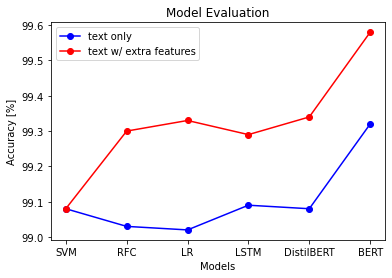

In [6]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5, 6]
y1 = [99.08, 99.03, 99.02, 99.09, 99.08, 99.32]  # x-axis values
y2 = [99.08, 99.3, 99.33, 99.29, 99.34, 99.58]  # y-axis values

# Plotting the line chart
plt.plot(x, y1, color='blue', marker='o', label='text only')
plt.plot(x, y2, color='red', marker='o', label='text w/ extra features')

# Adding legends
plt.legend()

# Setting custom labels for the x-axis
x_labels = ['SVM', 'RFC', 'LR', 'LSTM', 'DistilBERT', 'BERT']
plt.xticks(x, x_labels)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy [%]')
plt.title('Model Evaluation')
plt.savefig("images/evaluations.png")
# Display the chart
plt.show()
